Stažení souboru

In [0]:
!wget https://mlj.solutions/biopy.xlsx

--2019-11-20 11:38:21--  https://mlj.solutions/biopy.xlsx
Resolving mlj.solutions (mlj.solutions)... 54.201.139.97, 54.186.164.90
Connecting to mlj.solutions (mlj.solutions)|54.201.139.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81763 (80K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘biopy.xlsx.1’

biopy.xlsx.1        100%[===================>]  79.85K  --.-KB/s    in 0.01s   

2019-11-20 11:38:21 (5.85 MB/s) - ‘biopy.xlsx.1’ saved [81763/81763]



# Nejprve si porovnáme DataFrame a matplotlib

In [0]:
import pandas as pd
sheet = pd.read_excel('biopy.xlsx', sheet_name='c-value all3')

## Pandas + DataFrame

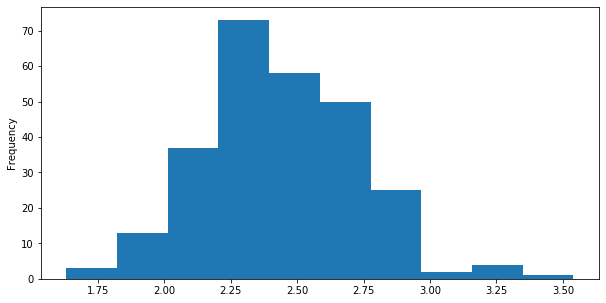

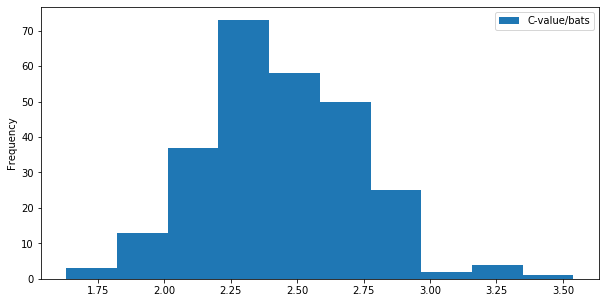

In [0]:
from pandas import DataFrame
import matplotlib.pyplot as plt

DataFrame(sheet)['C-value/bats'].plot.hist(figsize=(10, 5))
plt.show()

## matplotlib

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


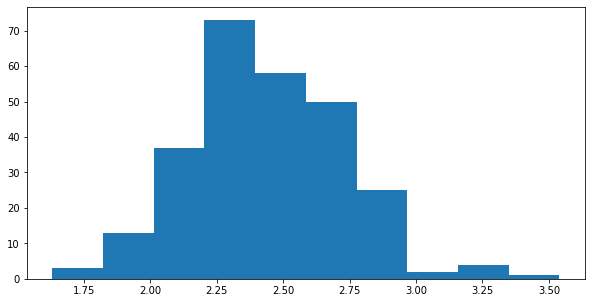

In [0]:

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))

plt.hist(sheet['C-value/bats'], label=['C-value/bats'])
plt.show()

# precist exel

In [0]:
c_sheet = pd.read_excel('biopy.xlsx', sheet_name='c-value all3')
gc_sheet = pd.read_excel('biopy.xlsx', sheet_name='GC% all3')

Subplots

Text(0.5, 0, 'PG')

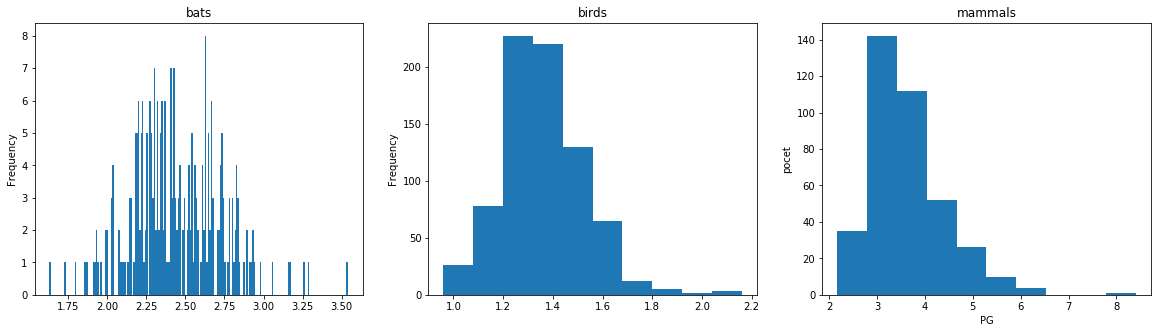

In [0]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

c_sheet['C-value/birds'].plot.hist(ax=axes[1]);
axes[1].set_title('birds');

c_sheet['C-value/bats'].plot.hist(ax=axes[0], bins=200);
axes[0].set_title('bats');

c_sheet['C-value/mammals'].plot.hist(ax=axes[2]);
axes[2].set_title('mammals');
axes[2].set_ylabel("pocet")
axes[2].set_xlabel("PG")

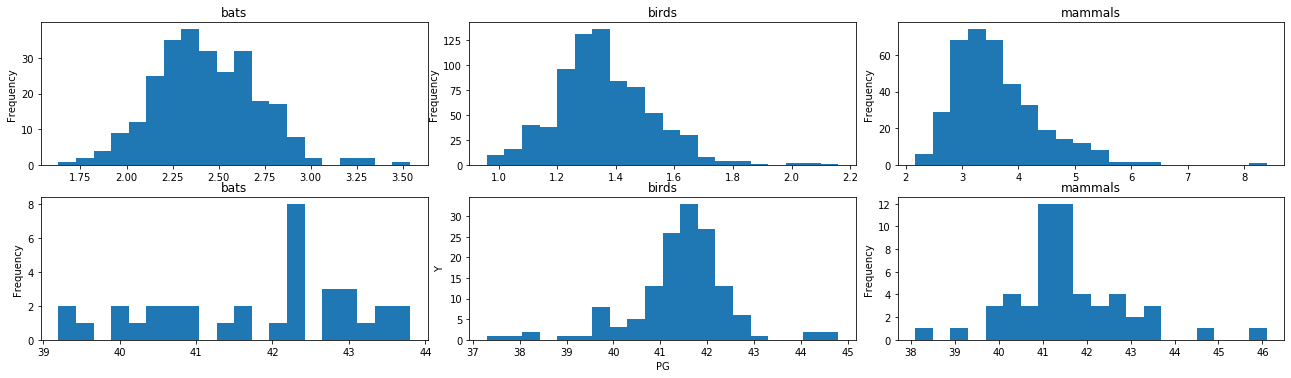

In [0]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))
plt.tight_layout()

c_sheet['C-value/bats'].plot.hist(ax=axes[0, 0], bins=20);
axes[0, 0].set_title('bats');

c_sheet['C-value/birds'].plot.hist(ax=axes[0, 1], bins=20);
axes[0, 1].set_title('birds');

c_sheet['C-value/mammals'].plot.hist(ax=axes[0, 2], bins=20);
axes[0, 2].set_title('mammals');


gc_sheet['GC%/bats'].plot.hist(ax=axes[1, 0], bins=20);
axes[1, 0].set_title('bats');

gc_sheet['GC%/bird'].plot.hist(ax=axes[1, 1], bins=20);
axes[1, 1].set_title('birds');
axes[1, 1].set_ylabel('Y');
axes[1, 1].set_xlabel('PG');

gc_sheet['GC%/mammals'].plot.hist(ax=axes[1, 2], bins=20);
axes[1, 2].set_title('mammals');

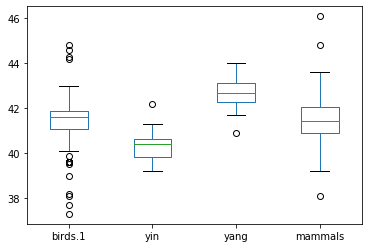

[(<matplotlib.patches.PathPatch object at 0x7f3010591ef0>, 'pink'), (<matplotlib.patches.PathPatch object at 0x7f301052b550>, 'red'), (<matplotlib.patches.PathPatch object at 0x7f3010537ba8>, 'purple'), (<matplotlib.patches.PathPatch object at 0x7f3010551240>, 'lightgreen')]


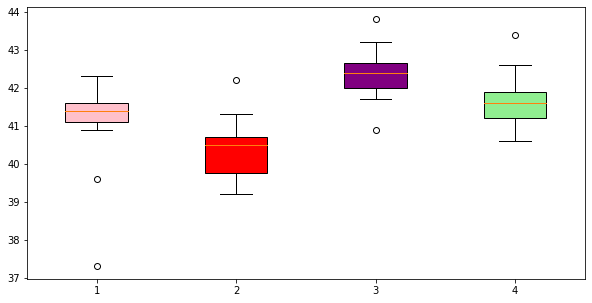

In [0]:
import matplotlib.pyplot as plt

labels = ['birds.1', 'yin',	'yang',	'mammals']
frame = DataFrame(gc_sheet, columns=labels) # filtrujeme jen pro sloupce co nas zajímají
frame.plot.box()
plt.show()


# nestačí jednoduche vykreslování, přejdeme tedy k matplotlib
fig = plt.figure(figsize=(10, 5))
bplot = plt.boxplot(frame.dropna().T, patch_artist=True) # frame odebere nan hodnoty (.dropnan()) a použije se transponovaná tabulka (.T)

# fill with colors
colors = ['pink', 'red', 'purple', 'lightgreen'] # jelikož vím, že mám 4 skupiny definuji 4 barvy
print(list(zip(bplot['boxes'], colors))) # debug pro pochopení zipu
for box, color in zip(bplot['boxes'], colors): # `zip` mi udělá pole, kde je uložen jeden box a jedna barva
  box.set_facecolor(color)  # nastavím barbu onomu boxu

plt.savefig('box.png') # uložení, nemí být před tímto řádkem `plt.show()`

### SCATTER

Základní způsob vykreslení scatteru

,bats,C-value/bats,GC%/bats
0,Tadarida brasiliensis,2.94,42.4
1,Pteronotus parnellii,2.35,40.8
5,Noctilio leporinus,2.37,40.9
7,Artibeus jamaicensis,2.56,42.2
12,Carollia perspicillata,2.63,42.7
17,Desmodus rotundus,2.39,42.3
20,Micronycteris hirsuta,2.24,42.4
21,Eidolon helvum,2.03,39.2
22,Eonycteris spelaea,2.23,40.3
23,Macroglossus sobrinus,2.15,39.6


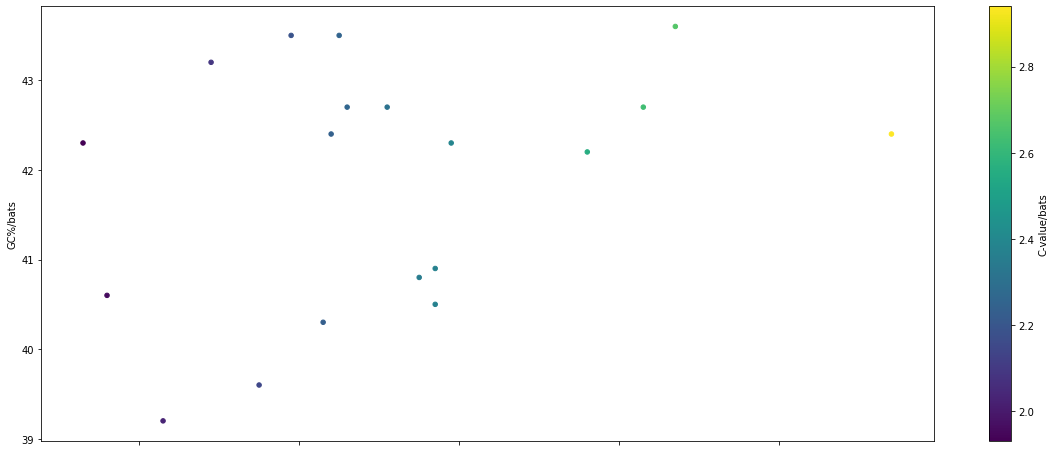

In [0]:
import numpy as np
import matplotlib.pyplot as plt


#načtu si nový dataframe obsahující jen sloupce co mě zajímají
# odeberu prázdné hodnoty
# přejmenuji sloupec Bat na bat, abych měl shodná název
c_frame = DataFrame(c_sheet, columns=['Bats', 'C-value/bats']).dropna().rename(columns={'Bats': 'bats'})

#načtu si nový dataframe obsahující jen sloupce co mě zajímají
#odeberu prázdné hodnoty
gc_frame = DataFrame(gc_sheet, columns=['bats', 'GC%/bats']).dropna()

# spojíme 2 DataFramy do jednoho `inner` pouze pro shodu
# odebereme prázdné řádky
# odebereme duplicity podle sloupce `bat`
merged_bats = pd.merge(c_frame, gc_frame, how='inner').dropna().drop_duplicates(subset=['bats'])
display(merged_bats) # debug výpis

# vykreslím x, y dle toho co mě zajímá a body obarvím stupnicí `virids` podle hodnoty `c='C-value/bats'`
merged_bats.plot.scatter(x='C-value/bats', y='GC%/bats', c='C-value/bats', colormap='viridis', figsize=(20,8))

plt.show() # vykreslení

A co kdyby jsme chtěli fitovat přímkou?

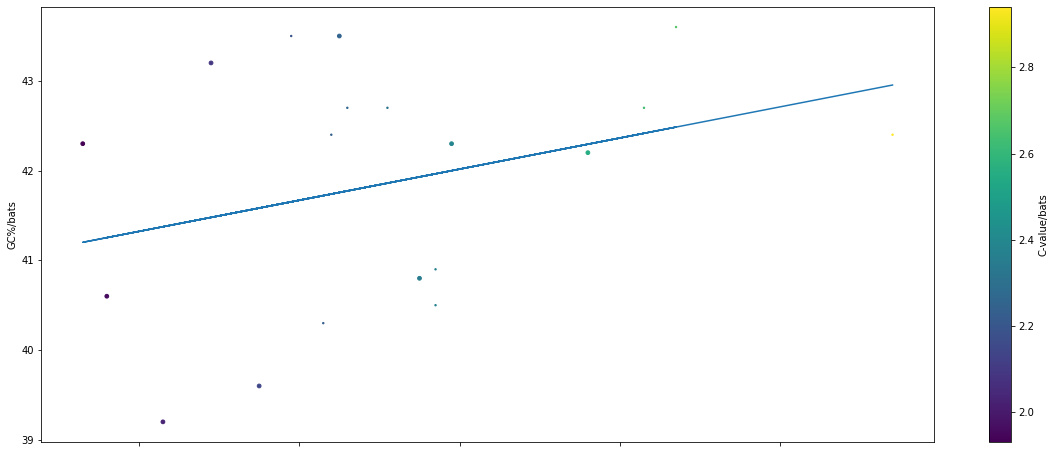

In [0]:
import numpy as np
import matplotlib.pyplot as plt

###### tento kod je stejný jako ten o buňku nahoru
c_frame = DataFrame(c_sheet, columns=['Bats', 'C-value/bats']).dropna().rename(columns={'Bats': 'bats'})
gc_frame = DataFrame(gc_sheet, columns=['bats', 'GC%/bats']).dropna()

merge = pd.merge(c_frame, gc_frame, how='inner').dropna().drop_duplicates(subset=['bats'])
merge.plot.scatter(x='C-value/bats', y='GC%/bats', s=[2, 14], c='C-value/bats', colormap='viridis', figsize=(20,8))
######

# vytříme polyfit
from numpy.polynomial.polynomial import polyfit # importuji fukci z knihovny
b, m = polyfit(merge['C-value/bats'], merge['GC%/bats'], 1) # vypočítám polifit
plt.plot(merge['C-value/bats'], b + m * merge['C-value/bats'], '-') # plotnu jako přímku

plt.show() # vykreslení

Pojďme na to chytřeji a definujme funkci

In [0]:
def scatter_plot(X: DataFrame, Y: DataFrame, dump=False):
  import numpy as np

  df1 = X.dropna()
  if dump:
    display(df1)

  df2 = Y.dropna()
  if dump:
    display(df2)

  merge = pd.merge(df1, df2, how='inner').dropna().drop_duplicates(subset=['id'])
  if len(merge) == 0:
    print('empty merge')
    return
  if dump:
    display(merge)

  merge.plot.scatter(x='X', y='Y', c='X', s=[2, 10], colormap='viridis', figsize=(20,8))

  from numpy.polynomial.polynomial import polyfit
  b, m = polyfit(merge['X'], merge['Y'], 1)
  plt.plot(merge['X'], b + m * merge['X'], '-')

  plt.show()

netopíři 🦇 

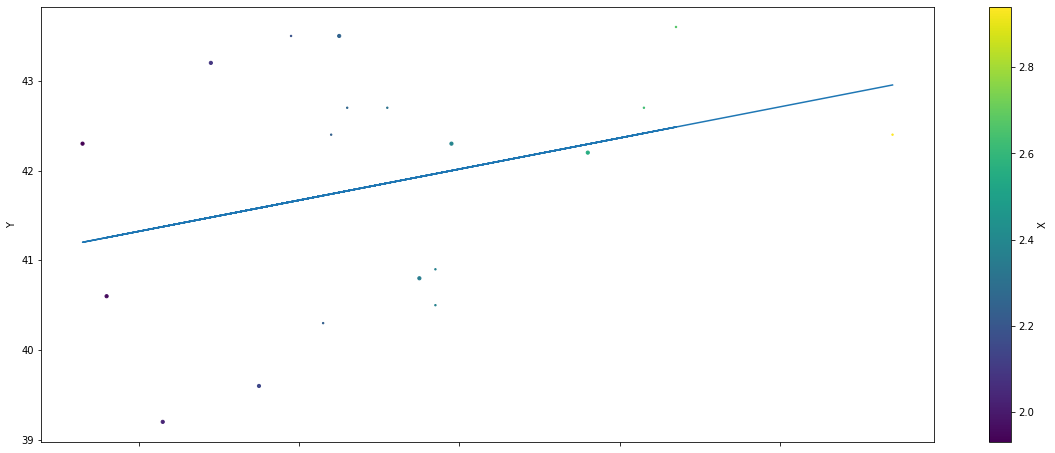

In [0]:
X=DataFrame(c_sheet, columns=['Bats', 'C-value/bats']).rename(columns={'Bats': 'id', 'C-value/bats': 'X'})
Y=DataFrame(gc_sheet, columns=['bats', 'GC%/bats']).rename(columns={'bats': 'id', 'GC%/bats': 'Y'})

scatter_plot(X, Y)

ptáci 🦜🦢🦩🦅🦉

In [0]:
X=DataFrame(c_sheet, columns=['Birds', 'C-value/birds']).rename(columns={'Birds': 'id', 'C-value/birds': 'X'})
Y=DataFrame(gc_sheet, columns=['birds', 'GC%/bird']).rename(columns={'birds': 'id', 'GC%/bird': 'Y'})

scatter_plot(X, Y)

empty merge


ostatní bez netopíru 

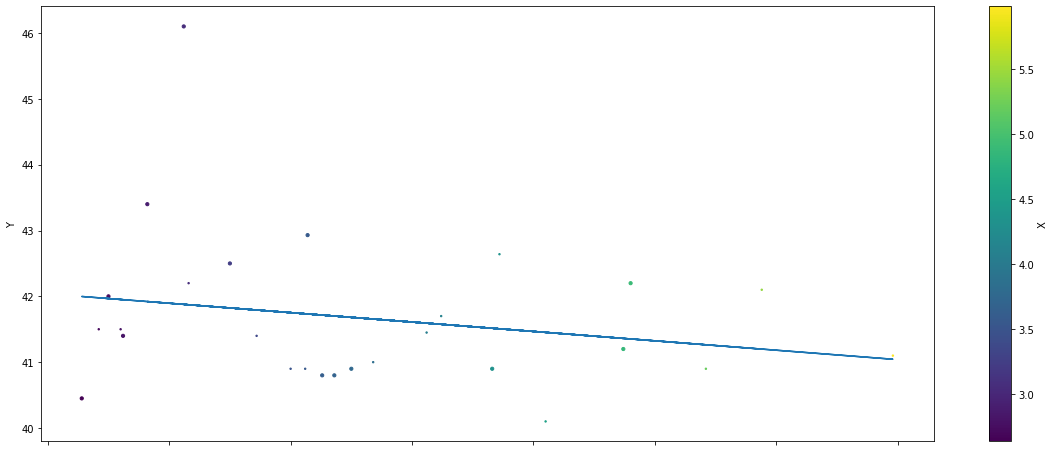

In [0]:
X = DataFrame(c_sheet, columns=['Mammals without bats', 'C-value/mammals']).rename(columns={'Mammals without bats': 'id', 'C-value/mammals': 'X'})
Y = DataFrame(gc_sheet, columns=['mammals withut bats', 'GC%/mammals']).rename(columns={'mammals withut bats': 'id', 'GC%/mammals': 'Y'})
scatter_plot(X, Y)

# Boxplot jednotlivých transpozonu

vyžaduje Scleropages_rs.xlsx

In [0]:
gc_sheet = DataFrame(pd.read_excel('Scleropages_rs.xlsx', sheet_name='all_histogram'), columns=['Gypsy',	'Ngaro','Dong',	'L1',	'L2',	'R2',	'Rex',	'RTE',	'MIR',	'tRNA',	'CMC',	'hAT',	'Sola',	'Tc1-Mariner'])

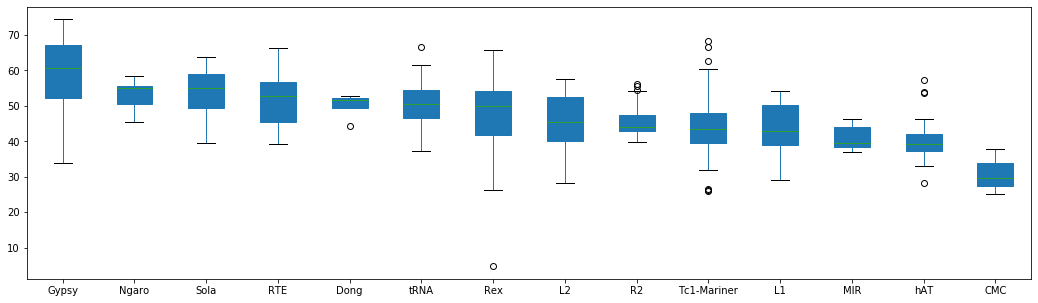

In [0]:
med = gc_sheet.median().sort_values(ascending=False)

ax = gc_sheet[med.index].plot.box(figsize=(18,5), patch_artist=True)